In [4]:
import pandas as pd
df = pd.read_csv("products_asos.csv")

In [5]:
df.head

<bound method NDFrame.head of                                                      url  \
0      https://www.asos.com/stradivarius/stradivarius...   
1      https://www.asos.com/stradivarius/stradivarius...   
2      https://www.asos.com/asos-design/asos-design-l...   
3      https://www.asos.com/new-look/new-look-trench-...   
4      https://www.asos.com/stradivarius/stradivarius...   
...                                                  ...   
30840  https://www.asos.com/urban-revivo/urban-revivo...   
30841  https://www.asos.com/asos-design/asos-design-l...   
30842  https://www.asos.com/asyou/asyou-layered-t-shi...   
30843  https://www.asos.com/miss-selfridge/miss-selfr...   
30844  https://www.asos.com/other-stories/other-stori...   

                                                    name  \
0                          New Look trench coat in camel   
1                          New Look trench coat in camel   
2                          New Look trench coat in camel   
3        

In [14]:
print(df.columns)
print(df.shape)

Index(['url', 'name', 'size', 'category', 'price', 'color', 'sku',
       'description', 'images'],
      dtype='object')
(30502, 9)


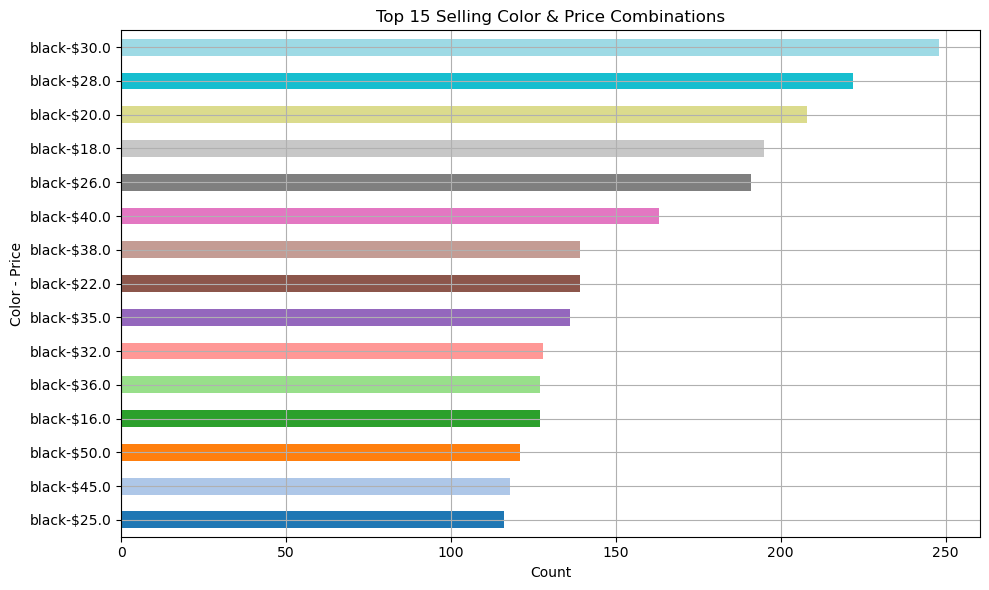

In [74]:
#目標:找出15款最熱銷之(顏色+價格)組合
import matplotlib.pyplot as plt
import numpy as np
colors = plt.cm.tab20(np.linspace(0, 1, len(combo_counts)))
#資料清理
df.loc[:,'color'] = df['color'].str.lower().str.strip()
df.loc[:,'price'] = pd.to_numeric(df['price'],errors = 'coerce')
df = df.dropna(subset = ['price'])
#資料整合(朝目標前進)
df['color_price'] = df['color'] + '-$' + df['price'].round(0).astype(str)
combo_counts = df['color_price'].value_counts().head(15)
#製圖
plt.figure(figsize=(10, 6))
combo_counts.sort_values().plot(kind='barh',color = colors)
plt.title('Top 15 Selling Color & Price Combinations')
plt.xlabel('Count')
plt.ylabel('Color - Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
#目標:整合各商品種類間平均價格
# 商品種類
keywords = ['coat', 'jacket', 'dress', 'leather', 'wool', 'tailored']
# 新欄位
for word in keywords:
    df[word] = df['description'].str.contains(word).astype(int)
# 找出平均價格
for word in keywords:
    avg_price = df[df[word] == 1]['price'].mean()
    print(f"{word}: avg price ${avg_price:.2f}")

coat: avg price $81.70
jacket: avg price $56.73
dress: avg price $49.15
leather: avg price $69.15
wool: avg price $65.51
tailored: avg price $63.53


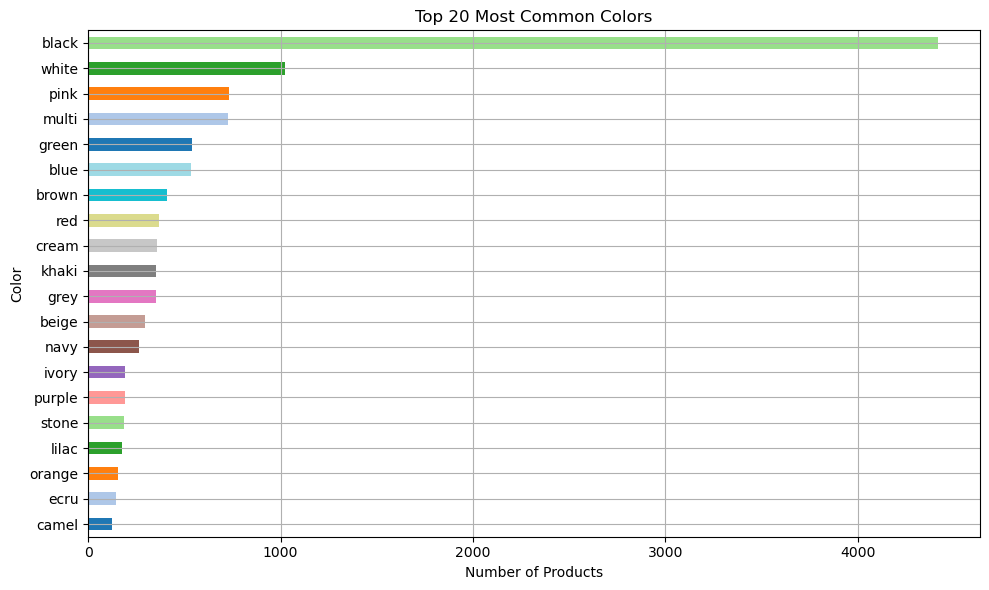

In [80]:
#目標:用顏色分類
#資料清理
df.loc[:,'color'] = df['color'].str.lower().str.strip()
color_counts = df['color'].value_counts().head(20)
#製圖
plt.figure(figsize=(10, 6))
color_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Top 20 Most Common Colors')
plt.xlabel('Number of Products')
plt.ylabel('Color')
plt.tight_layout()
plt.grid(True)
plt.show()